In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.1'

In [3]:
keras.__version__

'2.4.0'

### Reading the data

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
np.unique(y_valid)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
class_names = ["Tshirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_valid[0]]

'Ankle boot'

# Keras Sequential API

### Building the Model

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")], name="Mnist_Model")

In [12]:
model.summary()

Model: "Mnist_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
300*784

235200

In [14]:
model.layers

In [16]:
model.get_layer("dense_1")

In [17]:
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[ 0.05000402, -0.05992961,  0.05164048, ..., -0.05234205,
        -0.01248426, -0.03273728],
       [ 0.0473929 , -0.02704047, -0.04920133, ..., -0.04943941,
         0.03178407, -0.00458083],
       [ 0.05693263,  0.06473388, -0.06849327, ...,  0.06955715,
         0.04206069,  0.04217813],
       ...,
       [ 0.01247553,  0.01175727, -0.03685341, ..., -0.00403559,
        -0.05103397, -0.06850313],
       [ 0.03135417,  0.00833406, -0.02345856, ..., -0.04291496,
        -0.06594567,  0.00158928],
       [ 0.06198055,  0.04352616,  0.0503033 , ...,  0.04565582,
        -0.02950408,  0.07359961]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
weights.shape

(784, 300)

In [21]:
biases.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [34]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2239 - accuracy: 0.9191 - val_loss: 0.3120 - val_accuracy: 0.8840
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2204 - accuracy: 0.9205 - val_loss: 0.3011 - val_accuracy: 0.8906
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2172 - accuracy: 0.9218 - val_loss: 0.2926 - val_accuracy: 0.8932
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2128 - accuracy: 0.9231 - val_loss: 0.3041 - val_accuracy: 0.8888
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2104 - accuracy: 0.9246 - val_loss: 0.2869 - val_accuracy: 0.8968
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2059 - accuracy: 0.9265 - val_loss: 0.2985 - val_accuracy: 0.8910
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2044 - accuracy: 0.9264 - val_loss: 0.3037 - val_ac

In [24]:
history.history

{'loss': [0.7265991568565369,
  0.4927557110786438,
  0.4450525939464569,
  0.41711336374282837,
  0.3959476947784424,
  0.37959128618240356,
  0.36572006344795227,
  0.3530329465866089,
  0.3423042893409729,
  0.3338049352169037,
  0.3245781362056732,
  0.3186051547527313,
  0.309889018535614,
  0.3032786548137665,
  0.29709121584892273,
  0.29117119312286377,
  0.28443655371665955,
  0.27978217601776123,
  0.27441316843032837,
  0.2695232331752777,
  0.26348528265953064,
  0.2598818242549896,
  0.2552509009838104,
  0.25169068574905396,
  0.2481580376625061,
  0.24255767464637756,
  0.23910923302173615,
  0.23497651517391205,
  0.2318245768547058,
  0.2267872542142868],
 'accuracy': [0.7616000175476074,
  0.8285636305809021,
  0.843999981880188,
  0.8538545370101929,
  0.8604545593261719,
  0.8668363690376282,
  0.8708363771438599,
  0.8755999803543091,
  0.8789636492729187,
  0.8810908794403076,
  0.8842363357543945,
  0.8855090737342834,
  0.8890363574028015,
  0.8903999924659729,


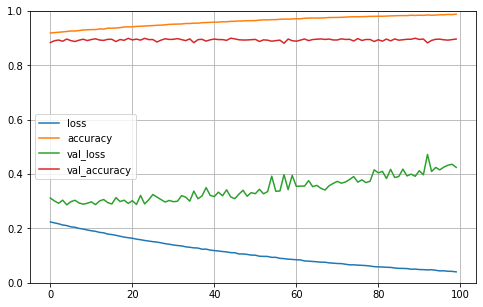

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
55000/32 # number of minibactchs of len 32

1718.75

In [36]:
model.evaluate(X_test, y_test, batch_size=1)

10000/10000 [==============================] - 11s 1ms/step - loss: 121.0517 - accuracy: 0.8434


[121.05171203613281, 0.8434000015258789]

In [37]:
X_test.shape[0]/32

312.5

### Predictions

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
X_new = X_test[:3]
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

# Keras Functional API

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
X_train.shape

(11610, 8)

In [7]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [8]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


#### Multiple inputs

In [4]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [15]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [9]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test[:, :5], X_test[:, 2:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=30, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.5666 - main_output_loss: 2.3051 - aux_output_loss: 4.9197 - val_loss: 1.4776 - val_main_output_loss: 1.2425 - val_aux_output_loss: 3.5941
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 1.2771 - main_output_loss: 1.0861 - aux_output_loss: 2.9958 - val_loss: 1.0308 - val_main_output_loss: 0.8877 - val_aux_output_loss: 2.3184
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.9870 - main_output_loss: 0.8632 - aux_output_loss: 2.1015 - val_loss: 0.8698 - val_main_output_loss: 0.7659 - val_aux_output_loss: 1.8050
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.8625 - main_output_loss: 0.7638 - aux_output_loss: 1.7507 - val_loss: 0.7902 - val_main_output_loss: 0.7002 - val_aux_output_loss: 1.6006
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7976 - main_output_loss: 0.7092 - aux_output_loss: 1.5928 - val_loss

In [20]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test, batch_size=1)
y_pred = model.predict((X_new_A, X_new_B))

5160/5160 [==============================] - 6s 1ms/step - loss: 0.4195


#### Multiple Outputs

In [19]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
output_aux = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, output_aux])

In [20]:
## each output needs its own loss 
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-5))

In [23]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=30, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.6321 - main_output_loss: 2.4599 - aux_output_loss: 4.1819 - val_loss: 1.3380 - val_main_output_loss: 1.1069 - val_aux_output_loss: 3.4181
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 1.0641 - main_output_loss: 0.8542 - aux_output_loss: 2.9527 - val_loss: 0.9280 - val_main_output_loss: 0.7476 - val_aux_output_loss: 2.5509
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.8510 - main_output_loss: 0.6889 - aux_output_loss: 2.3098 - val_loss: 0.8124 - val_main_output_loss: 0.6721 - val_aux_output_loss: 2.0746
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7759 - main_output_loss: 0.6452 - aux_output_loss: 1.9522 - val_loss: 0.7594 - val_main_output_loss: 0.6420 - val_aux_output_loss: 1.8166
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7361 - main_output_loss: 0.6229 - aux_output_loss: 1.7543 - val_loss

In [25]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 796us/step - loss: 0.5046 - main_output_loss: 0.4491 - aux_output_loss: 1.0035


In [26]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [27]:
y_pred_main

array([[0.9050617],
       [0.6616001],
       [2.1296847],
       ...,
       [2.7350054],
       [3.0624657],
       [1.9652317]], dtype=float32)

In [28]:
y_pred_aux

array([[1.5537205],
       [1.4857268],
       [1.9483924],
       ...,
       [2.1941953],
       [2.1259003],
       [1.8979888]], dtype=float32)

#### Saving

In [29]:
model.save("my_keras_model.h5")

In [30]:
model_loaded = keras.models.load_model("my_keras_model.h5")

In [31]:
model_loaded.predict([X_new_A, X_new_B])

[array([[0.9050617],
        [0.6616001],
        [2.1296847],
        ...,
        [2.7350054],
        [3.0624657],
        [1.9652317]], dtype=float32),
 array([[1.5537205],
        [1.4857268],
        [1.9483924],
        ...,
        [2.1941953],
        [2.1259003],
        [1.8979888]], dtype=float32)]

## CallBacks : checkpoint, earlyStoping ad Tensorboard

In [21]:
# create the tensorboard log file
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_%H_%M_%S")
    return os.path.join(root_logdir, run_id)


In [22]:
run_logdir = get_run_logdir()
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5") # dont need to use , save_best_only=True because restore_best_weights=True 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=200,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

# run on anaconda prompt: tensorboard --logdir=C:\Users\taoufik.elkhiraoui\PycharmProjects\tf_handson\my_logs --port=6006

Epoch 1/200
363/363 [==============================] - 1s 4ms/step - loss: 5.3652 - main_output_loss: 5.5224 - aux_output_loss: 3.9506 - val_loss: 5.2074 - val_main_output_loss: 5.3535 - val_aux_output_loss: 3.8926
Epoch 2/200
363/363 [==============================] - 0s 1ms/step - loss: 5.2206 - main_output_loss: 5.3637 - aux_output_loss: 3.9326 - val_loss: 5.0688 - val_main_output_loss: 5.2015 - val_aux_output_loss: 3.8750
Epoch 3/200
363/363 [==============================] - 0s 1ms/step - loss: 5.0810 - main_output_loss: 5.2107 - aux_output_loss: 3.9141 - val_loss: 4.9350 - val_main_output_loss: 5.0548 - val_aux_output_loss: 3.8570
Epoch 4/200
363/363 [==============================] - 0s 1ms/step - loss: 4.9461 - main_output_loss: 5.0629 - aux_output_loss: 3.8953 - val_loss: 4.8056 - val_main_output_loss: 4.9131 - val_aux_output_loss: 3.8385
Epoch 5/200
363/363 [==============================] - 0s 1ms/step - loss: 4.8158 - main_output_loss: 4.9202 - aux_output_loss: 3.8759 - val

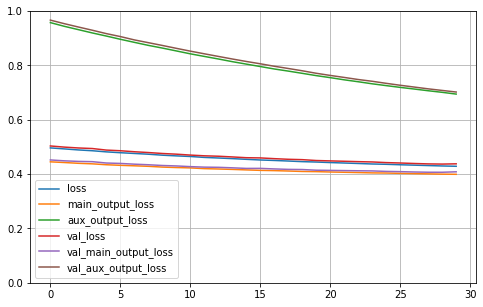

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Hyperparams fine tuning: wrappe keras model into a sciktlearn model, and use gridsearch as usual

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model
    

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

In [ ]:
X_new = X_test[:2, :]
y_pred = keras_reg.predict(X_new)
y_pred

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons" : np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=2, cv=3) # n_inter: number of parameters samples to try

In [ ]:
rnd_search_cv.fit(X_train, y_train, epochs=100, 
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.estimator.model

In [ ]:
model

In [13]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [14]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.3055 - val_loss: 1.1383
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7167 - val_loss: 1.0005
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5911 - val_loss: 0.5755
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5507 - val_loss: 0.5774
Epoch 5/100
363/363 [==============================] - 0s 937us/step - loss: 0.5257 - val_loss: 0.8025
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5077 - val_loss: 0.5058
Epoch 7/100
363/363 [==============================] - 0s 972us/step - loss: 0.4948 - val_loss: 0.4988
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4828 - val_loss: 0.7007
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4747 - val_loss: 0.4768
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4717 - va

In [15]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 698us/step - loss: 0.3686


In [18]:
X_new = X_test[:2, :]
y_pred = keras_reg.predict(X_new)
y_pred

array([1.7784914, 3.0260742], dtype=float32)

In [46]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons" : np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [49]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=2, cv=3) # n_inter: number of parameters samples to try

In [50]:
rnd_search_cv.fit(X_train, y_train, epochs=100, 
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0512 - val_loss: 0.5588
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5353 - val_loss: 1.8379
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5097 - val_loss: 4.0797
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5046 - val_loss: 6.3689
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5006 - val_loss: 7.8913
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4989 - val_loss: 9.1181
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4970 - val_loss: 10.0871
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4992 - val_loss: 11.0097
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4992 - val_loss: 10.8695
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4968 - val

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002263E871040>, as the constructor either does not set or modifies parameter learning_rate

In [51]:
rnd_search_cv.best_params_

{'learning_rate': 0.0004087057440660127, 'n_hidden': 2, 'n_neurons': 45}

In [52]:
rnd_search_cv.best_score_

-0.4219512343406677

In [54]:
model = rnd_search_cv.estimator.model

In [55]:
model